### Project Documentation for Sistem Temu Kembali Informasi (STKI)

# 1. Judul / Topik Project dan Identitas Lengkap

**Judul**: Decision Tree untuk Klasifikasi Status Gizi Balita Berdasarkan Data Stunting  
**Nama Lengkap**: Ricky Arnold Hasudungan S  
**NIM**: A11.2022.14010  
**Universitas**: Universitas Dian Nuswantoro  
**Fakultas**: Teknik Informatika 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from jcopml.plot import plot_missing_value
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 2. Ringkasan dan Permasalahan Project

## Ringkasan
Proyek ini bertujuan untuk mengklasifikasikan status gizi balita berdasarkan data stunting menggunakan model Decision Tree. Sistem ini diharapkan dapat membantu instansi kesehatan dalam mengidentifikasi kategori status gizi dengan lebih cepat dan akurat.

## Permasalahan
Stunting pada balita merupakan salah satu masalah kesehatan yang serius, terutama di negara berkembang. Identifikasi dini dan akurat terhadap status gizi balita sangat penting untuk memberikan intervensi yang tepat. Dengan menggunakan pendekatan berbasis data, analisis status gizi dapat dilakukan dengan lebih efisien.

## Tujuan
- Membuat model Decision Tree yang dapat mengklasifikasikan status gizi balita.
- Melakukan eksplorasi data (EDA) untuk memahami pola dan distribusi data.
- Mengevaluasi performa model Decision Tree.

## Model / Alur Penyelesaian
```mermaid
graph TD
    A[Mulai] --> B[Memahami Permasalahan dan Tujuan]
    B --> C[Pengumpulan dan Eksplorasi Data (EDA)]
    C --> D[Proses Features Dataset]
    D --> E[Modeling dengan Decision Tree]
    E --> F[Evaluasi Performa Model]
    F --> G[Diskusi Hasil dan Kesimpulan]
    G --> H[Selesai]
```


# 3. Penjelasan Dataset, EDA, dan Proses Features Dataset

## Penjelasan Dataset
Dataset ini berisi informasi tentang balita dengan fitur-fitur berikut:  
- **Umur (bulan)**: Usia balita dalam bulan.
- **Jenis Kelamin**: Jenis kelamin balita (laki-laki/perempuan).
- **Tinggi Badan (cm)**: Tinggi badan balita dalam satuan sentimeter.
- **Status Gizi**: Kategori status gizi (stunted, severely stunted, normal, tinggi).


In [21]:
# Muat data
data = pd.read_csv('data_balita.csv')

# Tampilkan beberapa baris dari data
data

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


## Eksplorasi Data (EDA)

,missing_value,%
Umur (bulan),0,0.0
Jenis Kelamin,0,0.0
Tinggi Badan (cm),0,0.0
Status Gizi,0,0.0


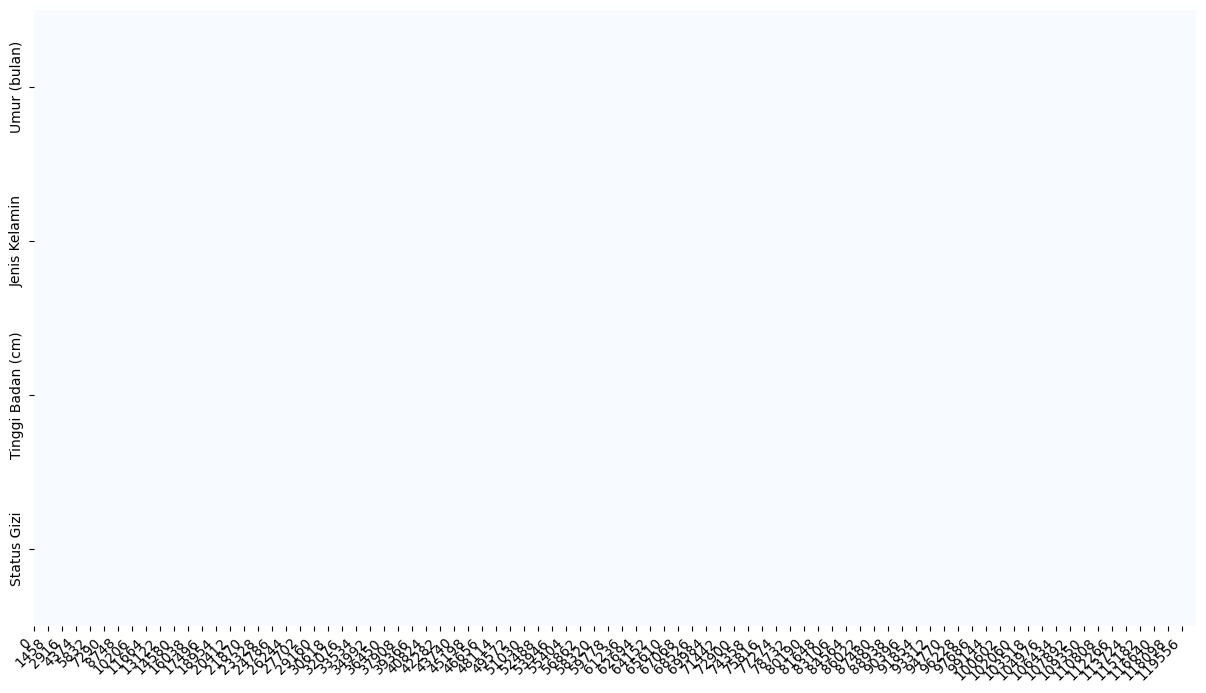

In [22]:
plot_missing_value(data, return_df = True)

In [23]:
# Informasi dasar 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB
None


In [24]:
# Deskripsi statistik
print(data.describe())

        Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000


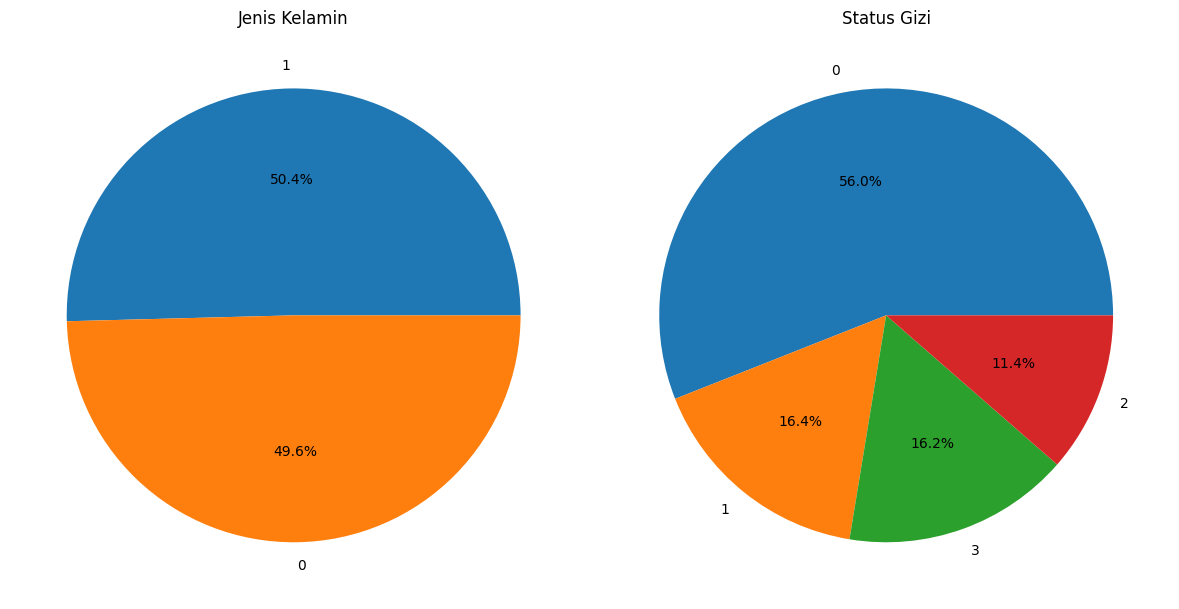

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(data['Jenis Kelamin'].value_counts(), labels=data['Jenis Kelamin'].value_counts().index, autopct='%1.1f%%')
axes[0].set_title('Jenis Kelamin')
axes[1].pie(data['Status Gizi'].value_counts(), labels=data['Status Gizi'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title('Status Gizi')
plt.tight_layout()
plt.show()

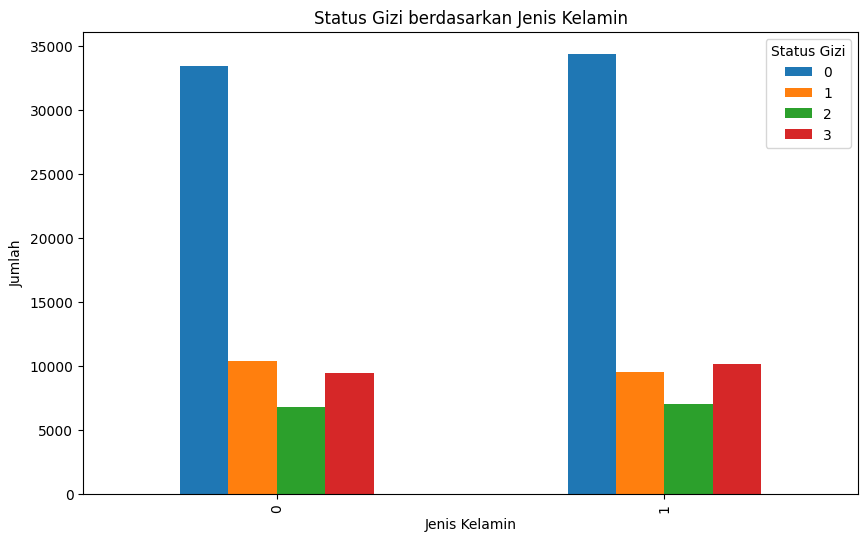

In [40]:
data_kelamin = data.groupby(['Jenis Kelamin', 'Status Gizi']).size().unstack()
data_kelamin.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.title('Status Gizi berdasarkan Jenis Kelamin')
plt.legend(title='Status Gizi')
plt.show()

## Proses Features Dataset

In [39]:
encoder = LabelEncoder()
data['Jenis Kelamin'] = encoder.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = encoder.fit_transform(data['Status Gizi'])

print(data.head())

   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0             0              0          44.591973            2
1             0              0          56.705203            3
2             0              0          46.863358            0
3             0              0          47.508026            0
4             0              0          42.743494            1


In [26]:
print(data['Jenis Kelamin'].value_counts())

Jenis Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int64


In [27]:
print(data['Status Gizi'].value_counts())

Status Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: count, dtype: int64


## 4. Proses Learning / Modeling

In [42]:
#data processing
le = LabelEncoder()
data['Jenis Kelamin'] = le.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = le.fit_transform(data['Status Gizi'])

In [31]:
# Pisahkan fitur dan target
X = data[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y = data['Status Gizi']

In [32]:
# data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Buat dan latih model decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 5. Performa Model

In [34]:
# evaluasi moodel pada training
y_pred_train = clf.predict(X_train)
acc_train_tree = accuracy_score(y_train, y_pred_train)
print('Accuracy of Decision Tree on Training:', acc_train_tree)

Accuracy of Decision Tree on Training: 1.0


In [35]:
# evaluasi model pada data testing
y_pred_test = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy of Decision Tree on Test:', acc_test)

Accuracy of Decision Tree on Test: 0.9990082644628099


In [36]:
# cross validation pada data training
cv = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

Cross-validation scores: [0.99772727 0.99896694 0.99803719 0.99938017 0.99803719 0.99938017
 0.99845041 0.99865702 0.99793388 0.99793367]
Mean cross-validation score: 0.9984503918767647


# 6. Diskusi Hasil dan Kesimpulan

## Diskusi Hasil
Model Decision Tree berhasil mencapai tingkat akurasi sebesar 0.9990082644628099 dengan distribusi yang baik untuk semua kategori status gizi. Namun, terdapat beberapa kelemahan seperti kemungkinan overfitting.

## Kesimpulan
- Sistem berbasis Decision Tree dapat memberikan keputusan objektif untuk klasifikasi status gizi balita.
- Hasil eksplorasi data menunjukkan bahwa umur dan tinggi badan memiliki pengaruh besar terhadap status gizi.
